In [5]:
# importing required libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import pickle
from os import path
import socket
import struct

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset, random_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import joblib

In [6]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/IIOT_IDS/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/IIOT_IDS


In [7]:
data = pd.read_csv('X-IIoTIDdataset.csv')

<ipython-input-7-cadcfc853302>:1: DtypeWarning: Columns (1,3,5,12,24) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('X-IIoTIDdataset.csv')


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820834 entries, 0 to 820833
Data columns (total 68 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   Date                         820503 non-null  object
 1   Timestamp                    820537 non-null  object
 2   Scr_IP                       820834 non-null  object
 3   Scr_port                     820834 non-null  object
 4   Des_IP                       820834 non-null  object
 5   Des_port                     820834 non-null  object
 6   Protocol                     820834 non-null  object
 7   Service                      820834 non-null  object
 8   Duration                     820834 non-null  object
 9   Scr_bytes                    820834 non-null  object
 10  Des_bytes                    820834 non-null  object
 11  Conn_state                   820834 non-null  int64 
 12  missed_bytes                 820834 non-null  object
 13  is_syn_only   

In [9]:
data.isnull().sum()

Date                           331
Timestamp                      297
Scr_IP                           0
Scr_port                         0
Des_IP                           0
                              ... 
read_write_physical.process      0
is_privileged                    0
class1                           0
class2                           0
class3                           0
Length: 68, dtype: int64

In [10]:
data.dropna(inplace=True)

In [11]:
data.shape

(820502, 68)

In [12]:
data['class1'].value_counts()

Normal                            421417
RDOS                              141261
Scanning_vulnerability             52852
Generic_scanning                   50277
BruteForce                         47241
MQTT_cloud_broker_subscription     23524
Discovering_resources              23148
Exfiltration                       22134
insider_malcious                   17447
Modbus_register_reading             5953
False_data_injection                5094
C&C                                 2863
Dictionary                          2572
TCP Relay                           2119
fuzzing                             1313
Reverse_shell                       1016
crypto-ransomware                    154
MitM                                 117
Name: class1, dtype: int64

In [13]:
# Convert 'Timestamp' to datetime using Unix timestamps
data['Timestamp'] = pd.to_datetime(data['Timestamp'], errors='coerce', unit='s')



In [14]:
# Iterate through all columns and rows to find occurrences of 'aza'
for column in data.columns:
    for index, value in enumerate(data[column]):
        if 'aza' in str(value):
            print(f"Found 'aza' in column '{column}' at index {index}")


Found 'aza' in column 'Avg_user_time' at index 13596
Found 'aza' in column 'Avg_user_time' at index 87664
Found 'aza' in column 'Avg_user_time' at index 96530
Found 'aza' in column 'Avg_user_time' at index 255619
Found 'aza' in column 'Avg_user_time' at index 257053
Found 'aza' in column 'Avg_user_time' at index 283436
Found 'aza' in column 'Avg_user_time' at index 328847
Found 'aza' in column 'Avg_user_time' at index 345560
Found 'aza' in column 'Avg_user_time' at index 360818
Found 'aza' in column 'Avg_user_time' at index 471497
Found 'aza' in column 'Avg_user_time' at index 513735
Found 'aza' in column 'Avg_user_time' at index 515742
Found 'aza' in column 'Avg_user_time' at index 595294
Found 'aza' in column 'Avg_user_time' at index 623933
Found 'aza' in column 'Avg_user_time' at index 669354
Found 'aza' in column 'Avg_user_time' at index 705466
Found 'aza' in column 'Avg_user_time' at index 754037
Found 'aza' in column 'Avg_user_time' at index 784458


In [15]:
data = data[data['Avg_user_time'] != 'aza']

In [16]:
# Convert specific columns to int
columns_to_convert_int = ['Scr_port', 'Des_port', 'Conn_state', 'missed_bytes', 'total_packet', 'OSSEC_alert', 'OSSEC_alert_level', 'Login_attempt', 'Succesful_login', 'File_activity', 'Process_activity', 'read_write_physical.process', 'is_privileged']

# Replace '?' and '-' with -1 in columns before converting to int
data[columns_to_convert_int] = data[columns_to_convert_int].replace(['?', '-'], -1).astype(int)



# Convert specific columns to float
columns_to_convert_float = ['Duration', 'Scr_bytes', 'Des_bytes', 'paket_rate', 'byte_rate', 'Avg_user_time', 'Std_user_time', 'Avg_nice_time', 'Std_nice_time', 'Avg_system_time', 'Std_system_time', 'Avg_iowait_time', 'Std_iowait_time', 'Avg_ideal_time', 'Std_ideal_time', 'Avg_tps', 'Std_tps', 'Avg_rtps', 'Std_rtps', 'Avg_wtps', 'Std_wtps', 'Avg_ldavg_1', 'Std_ldavg_1', 'Avg_kbmemused', 'Std_kbmemused', 'Avg_num_Proc/s', 'Std_num_proc/s', 'Avg_num_cswch/s', 'std_num_cswch/s']
# Remove non-numeric characters and replace with NaN
data[columns_to_convert_float] = data[columns_to_convert_float].replace(['?', '-', 'aza'], np.nan).apply(pd.to_numeric, errors='coerce')



# Convert specific columns to string
columns_to_convert_str = ['Scr_IP', 'Des_IP', 'Protocol', 'Service', 'anomaly_alert', 'class1', 'class2', 'class3']
data[columns_to_convert_str] = data[columns_to_convert_str].astype(str)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 820484 entries, 0 to 820833
Data columns (total 68 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Date                         820484 non-null  object        
 1   Timestamp                    820330 non-null  datetime64[ns]
 2   Scr_IP                       820484 non-null  object        
 3   Scr_port                     820484 non-null  int64         
 4   Des_IP                       820484 non-null  object        
 5   Des_port                     820484 non-null  int64         
 6   Protocol                     820484 non-null  object        
 7   Service                      820484 non-null  object        
 8   Duration                     744723 non-null  float64       
 9   Scr_bytes                    596900 non-null  float64       
 10  Des_bytes                    596900 non-null  float64       
 11  Conn_state                

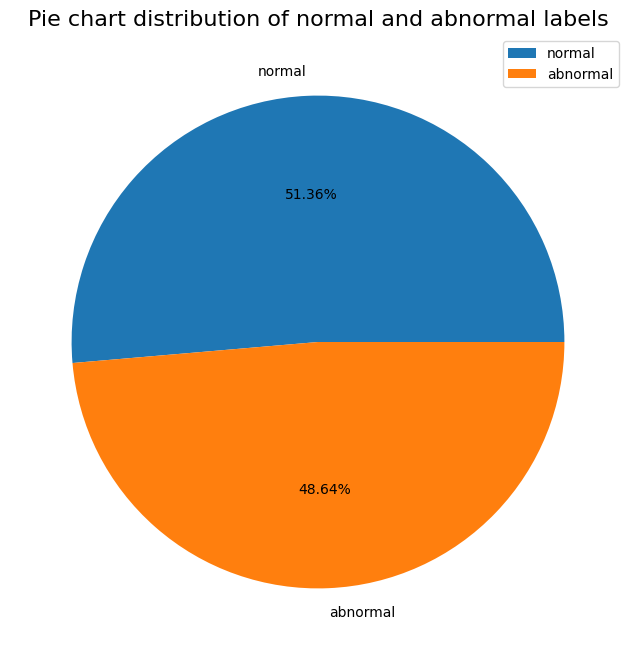

In [18]:
plt.figure(figsize=(8,8))
plt.pie(data.class3.value_counts(),labels=['normal','abnormal'],autopct='%0.2f%%')
plt.title("Pie chart distribution of normal and abnormal labels",fontsize=16)
plt.legend()
plt.savefig('Pie_chart_binary.png')
plt.show()

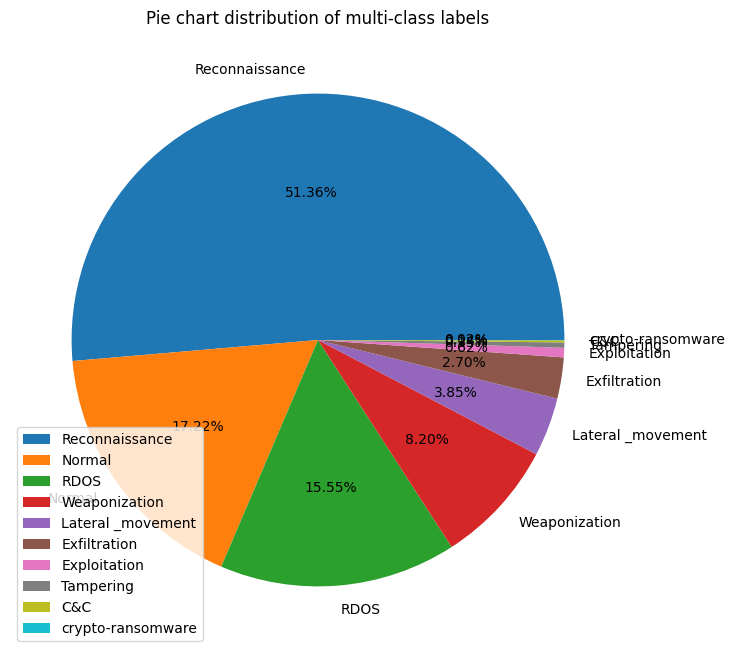

In [19]:
plt.figure(figsize=(8,8))
plt.pie(data.class2.value_counts(),labels=data.class2.unique(),autopct='%0.2f%%')
plt.title('Pie chart distribution of multi-class labels')
plt.legend(loc='best')
plt.savefig('Pie_chart_multi.png')
plt.show()

**Sample Data as data is too large to load in google Colab**

In [20]:
data_split = pd.read_csv('train_data.csv')

In [21]:
data_split.isnull().sum()

Date                           0
Timestamp                      0
Scr_IP                         0
Scr_port                       0
Des_IP                         0
                              ..
read_write_physical.process    0
is_privileged                  0
class1                         0
class2                         0
class3                         0
Length: 68, dtype: int64

In [22]:
# Replace '?' and '-' with NaN
data_split.replace(['?', '-'], pd.NA, inplace=True)

# Drop rows with any NaN values
data_split.dropna(inplace=True)

# Reset index after dropping rows
data_split.reset_index(drop=True, inplace=True)


In [23]:
data_split.shape

(92407, 68)

In [24]:
# Save the cleaned DataFrame to a new CSV file
data_split.to_csv('XIIOTIDS_dataset_Train.csv', index=False)

In [25]:
data_split

,Date,Timestamp,Scr_IP,Scr_port,Des_IP,Des_port,Protocol,Service,Duration,Scr_bytes,...,OSSEC_alert_level,Login_attempt,Succesful_login,File_activity,Process_activity,read_write_physical.process,is_privileged,class1,class2,class3
0,2020-11-02,1970-01-01 00:00:01.581384205,12,35004,36,1883,tcp,mqtt,5.207943,53.0,...,0,0,0,0,0,1,0,MQTT_cloud_broker_subscription,Lateral _movement,Attack
1,2020-03-02,1970-01-01 00:00:01.580712536,7,47097,32,1880,tcp,websocket,22.959334,16653.0,...,0,0,0,0,0,1,0,Normal,Normal,Normal
2,2019-12-16,1970-01-01 00:00:01.576632604,6,51198,32,5683,udp,coap,0.022444,10.0,...,0,0,0,0,0,1,0,Normal,Normal,Normal
3,2020-02-24,1970-01-01 00:00:01.582503864,3,39856,32,5683,udp,coap,0.553840,562.0,...,0,0,0,0,0,1,0,RDOS,RDOS,Attack
4,2020-10-01,1970-01-01 00:00:01.578620681,9,39274,52,53,udp,dns,0.000006,74.0,...,0,0,0,0,0,0,0,Normal,Normal,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92402,2020-03-03,1970-01-01 00:00:01.583221315,12,57329,36,1883,tcp,mqtt,20.036085,1626.0,...,0,0,0,0,0,1,0,False_data_injection,Tampering,Attack
92403,2020-09-01,1970-01-01 00:00:01.578543214,7,45471,32,53,udp,dns,0.000041,37.0,...,0,0,0,0,0,0,0,Normal,Normal,Normal
92404,2020-01-15,1970-01-01 00:00:01.579041381,15,40532,38,80,tcp,http,0.205301,131.0,...,0,0,0,0,0,0,0,BruteForce,Weaponization,Attack
92405,2020-04-02,1970-01-01 00:00:01.580743314,10,47754,38,80,tcp,http,5.792336,2055.0,...,0,0,0,0,0,1,0,Normal,Normal,Normal


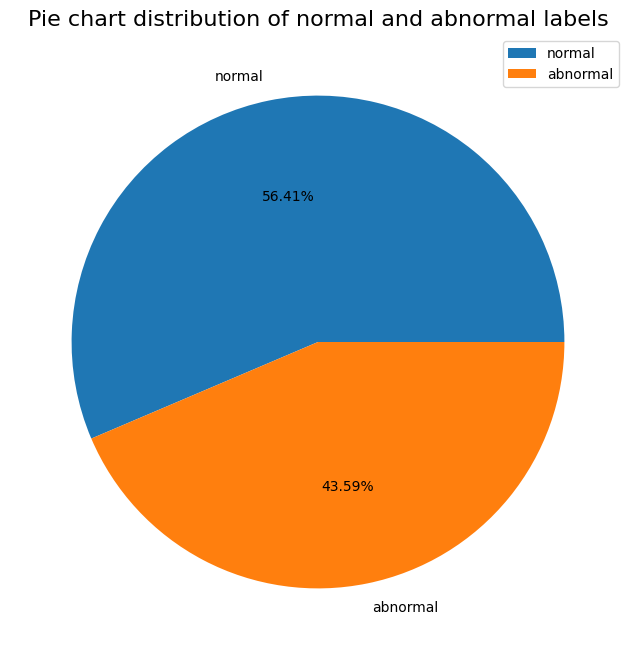

In [26]:
plt.figure(figsize=(8,8))
plt.pie(data_split.class3.value_counts(),labels=['normal','abnormal'],autopct='%0.2f%%')
plt.title("Pie chart distribution of normal and abnormal labels",fontsize=16)
plt.legend()
plt.savefig('Pie_chart_binary.png')
plt.show()

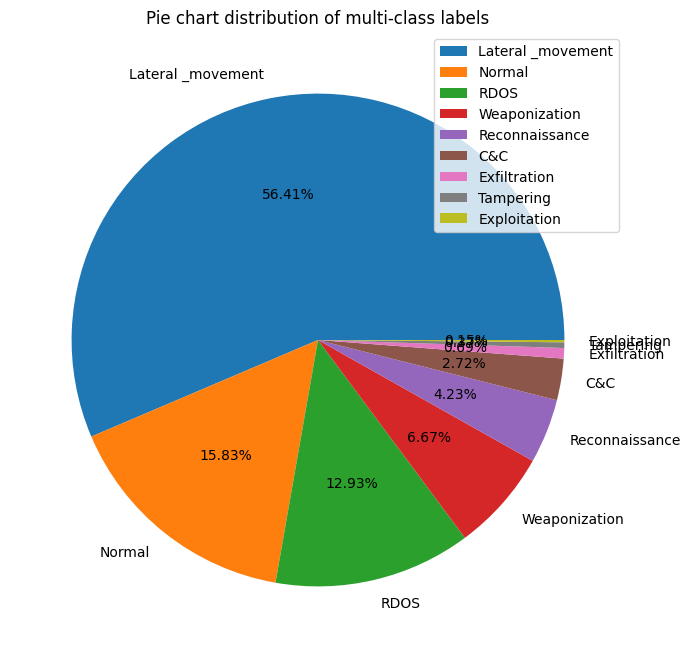

In [27]:
plt.figure(figsize=(8,8))
plt.pie(data_split.class2.value_counts(),labels=data_split.class2.unique(),autopct='%0.2f%%')
plt.title('Pie chart distribution of multi-class labels')
plt.legend(loc='best')
plt.savefig('Pie_chart_multi.png')
plt.show()

In [28]:
data_split['class1'].value_counts()

Normal                            52127
RDOS                              11946
Scanning_vulnerability             5963
Generic_scanning                   5440
BruteForce                         4030
Discovering_resources              3046
MQTT_cloud_broker_subscription     2898
Exfiltration                       2518
insider_malcious                   1880
Modbus_register_reading             737
False_data_injection                634
C&C                                 342
TCP Relay                           272
Dictionary                          258
fuzzing                             178
Reverse_shell                       124
MitM                                 14
Name: class1, dtype: int64

**Hot Encoding**

In [29]:
data_split['Timestamp'] = pd.to_datetime(data_split['Timestamp'], errors='coerce')
data_split['Date'] = pd.to_datetime(data_split['Date'], errors='coerce')



In [30]:
data_split

,Date,Timestamp,Scr_IP,Scr_port,Des_IP,Des_port,Protocol,Service,Duration,Scr_bytes,...,OSSEC_alert_level,Login_attempt,Succesful_login,File_activity,Process_activity,read_write_physical.process,is_privileged,class1,class2,class3
0,2020-11-02,1970-01-01 00:00:01.581384205,12,35004,36,1883,tcp,mqtt,5.207943,53.0,...,0,0,0,0,0,1,0,MQTT_cloud_broker_subscription,Lateral _movement,Attack
1,2020-03-02,1970-01-01 00:00:01.580712536,7,47097,32,1880,tcp,websocket,22.959334,16653.0,...,0,0,0,0,0,1,0,Normal,Normal,Normal
2,2019-12-16,1970-01-01 00:00:01.576632604,6,51198,32,5683,udp,coap,0.022444,10.0,...,0,0,0,0,0,1,0,Normal,Normal,Normal
3,2020-02-24,1970-01-01 00:00:01.582503864,3,39856,32,5683,udp,coap,0.553840,562.0,...,0,0,0,0,0,1,0,RDOS,RDOS,Attack
4,2020-10-01,1970-01-01 00:00:01.578620681,9,39274,52,53,udp,dns,0.000006,74.0,...,0,0,0,0,0,0,0,Normal,Normal,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92402,2020-03-03,1970-01-01 00:00:01.583221315,12,57329,36,1883,tcp,mqtt,20.036085,1626.0,...,0,0,0,0,0,1,0,False_data_injection,Tampering,Attack
92403,2020-09-01,1970-01-01 00:00:01.578543214,7,45471,32,53,udp,dns,0.000041,37.0,...,0,0,0,0,0,0,0,Normal,Normal,Normal
92404,2020-01-15,1970-01-01 00:00:01.579041381,15,40532,38,80,tcp,http,0.205301,131.0,...,0,0,0,0,0,0,0,BruteForce,Weaponization,Attack
92405,2020-04-02,1970-01-01 00:00:01.580743314,10,47754,38,80,tcp,http,5.792336,2055.0,...,0,0,0,0,0,1,0,Normal,Normal,Normal


In [31]:
# Convert IP address strings to integers
columns_to_convert_int = ['Scr_IP', 'Des_IP']

# Use LabelEncoder to convert IP addresses to numerical labels
label_encoder = LabelEncoder()
for col in columns_to_convert_int:
    data_split[col] = label_encoder.fit_transform(data_split[col])

In [32]:
columns_to_convert_int = ['Scr_pkts', 'Scr_ip_bytes', 'Des_pkts', 'Des_ip_bytes', 'total_bytes']

# Convert the specified columns to int data type
data_split[columns_to_convert_int] = data_split[columns_to_convert_int].astype(int)



In [33]:
data_split['anomaly_alert'] = data_split['anomaly_alert'].astype(bool)

In [34]:
# List of columns to convert to float
columns_to_convert_float = ['Scr_packts_ratio', 'Des_pkts_ratio', 'Scr_bytes_ratio', 'Des_bytes_ratio']

# Clean and convert the columns to float
data_split[columns_to_convert_float] = data_split[columns_to_convert_float].replace(['?', '-'], np.nan).astype(float)


In [35]:
# Save the updated DataFrame to a new CSV file
data_split.to_csv('XIIOTIDS_dataset_Train3.csv', index=False)

In [36]:
data_split.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92407 entries, 0 to 92406
Data columns (total 68 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date                         92407 non-null  datetime64[ns]
 1   Timestamp                    92407 non-null  datetime64[ns]
 2   Scr_IP                       92407 non-null  int64         
 3   Scr_port                     92407 non-null  int64         
 4   Des_IP                       92407 non-null  int64         
 5   Des_port                     92407 non-null  int64         
 6   Protocol                     92407 non-null  object        
 7   Service                      92407 non-null  object        
 8   Duration                     92407 non-null  float64       
 9   Scr_bytes                    92407 non-null  float64       
 10  Des_bytes                    92407 non-null  float64       
 11  Conn_state                   92407 non-nu

In [37]:
num_col = data_split.select_dtypes(include=['number', 'bool']).columns

# Excluding specific columns from the numeric columns
columns_to_exclude = ['Timestamp', 'class1', 'class2', 'class3']
num_col = num_col.difference(columns_to_exclude)

# Excluding columns from categorical columns
cat_col = data_split.columns.difference(num_col)
cat_col = cat_col.difference(['Timestamp', 'Date', 'class1', 'class2', 'class3'])


cat_col


Index(['Protocol', 'Service'], dtype='object')

In [38]:
# creating a dataframe with only categorical attributes
data_cat = data_split[cat_col].copy()
data_cat.head()

,Protocol,Service
0,tcp,mqtt
1,tcp,websocket
2,udp,coap
3,udp,coap
4,udp,dns


In [39]:
# creating a dataframe with only categorical attributes
data_cat = data_split[cat_col].copy()
data_cat.head()

,Protocol,Service
0,tcp,mqtt
1,tcp,websocket
2,udp,coap
3,udp,coap
4,udp,dns


In [40]:
data_split.shape

(92407, 68)

In [41]:
# one-hot-encoding categorical attributes using pandas.get_dummies() function
data_cat = pd.get_dummies(data_cat,columns=cat_col)

In [42]:
data_cat.head()

,Protocol_icmp,Protocol_tcp,Protocol_udp,Service_coap,Service_dhcp,Service_dns,Service_echo,Service_http,Service_https,Service_imap,Service_modbus,Service_mqtt,Service_mysql,Service_netbios-ns,Service_other,Service_private,Service_simple_service_discovery,Service_smtp,Service_ssh,Service_websocket
0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [43]:
data_split.shape

(92407, 68)

In [44]:
data_split = pd.concat([data_split, data_cat],axis=1)

In [45]:
data_split.shape

(92407, 88)

In [46]:
data_split.drop(columns=cat_col,inplace=True)

In [47]:
data_split.shape

(92407, 86)

In [48]:
data_split

,Date,Timestamp,Scr_IP,Scr_port,Des_IP,Des_port,Duration,Scr_bytes,Des_bytes,Conn_state,...,Service_modbus,Service_mqtt,Service_mysql,Service_netbios-ns,Service_other,Service_private,Service_simple_service_discovery,Service_smtp,Service_ssh,Service_websocket
0,2020-11-02,1970-01-01 00:00:01.581384205,12,35004,35,1883,5.207943,53.0,4803.0,0,...,0,1,0,0,0,0,0,0,0,0
1,2020-03-02,1970-01-01 00:00:01.580712536,7,47097,31,1880,22.959334,16653.0,49913.0,1,...,0,0,0,0,0,0,0,0,0,1
2,2019-12-16,1970-01-01 00:00:01.576632604,6,51198,31,5683,0.022444,10.0,21.0,1,...,0,0,0,0,0,0,0,0,0,0
3,2020-02-24,1970-01-01 00:00:01.582503864,3,39856,31,5683,0.553840,562.0,72.0,1,...,0,0,0,0,0,0,0,0,0,0
4,2020-10-01,1970-01-01 00:00:01.578620681,9,39274,51,53,0.000006,74.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92402,2020-03-03,1970-01-01 00:00:01.583221315,12,57329,35,1883,20.036085,1626.0,4.0,1,...,0,1,0,0,0,0,0,0,0,0
92403,2020-09-01,1970-01-01 00:00:01.578543214,7,45471,31,53,0.000041,37.0,37.0,1,...,0,0,0,0,0,0,0,0,0,0
92404,2020-01-15,1970-01-01 00:00:01.579041381,15,40532,37,80,0.205301,131.0,310.0,1,...,0,0,0,0,0,0,0,0,0,0
92405,2020-04-02,1970-01-01 00:00:01.580743314,10,47754,37,80,5.792336,2055.0,79682.0,1,...,0,0,0,0,0,0,0,0,0,0


**Data Normaliztion**

In [49]:
from sklearn.preprocessing import MinMaxScaler

# List of numeric columns (both integer and float) to normalize
numeric_columns = [
    'Scr_IP', 'Scr_port', 'Des_IP', 'Des_port', 'Conn_state', 'missed_bytes', 'Scr_pkts', 'Scr_ip_bytes',
    'Des_pkts', 'Des_ip_bytes', 'total_bytes', 'total_packet', 'OSSEC_alert', 'OSSEC_alert_level',
    'Login_attempt', 'Succesful_login', 'File_activity', 'Process_activity', 'read_write_physical.process',
    'is_privileged',
    'Duration', 'Scr_bytes', 'Des_bytes', 'paket_rate', 'byte_rate', 'Scr_packts_ratio', 'Des_pkts_ratio',
    'Scr_bytes_ratio', 'Des_bytes_ratio', 'Avg_user_time', 'Std_user_time', 'Avg_nice_time', 'Std_nice_time',
    'Avg_system_time', 'Std_system_time', 'Avg_iowait_time', 'Std_iowait_time', 'Avg_ideal_time', 'Std_ideal_time',
    'Avg_tps', 'Std_tps', 'Avg_rtps', 'Std_rtps', 'Avg_wtps', 'Std_wtps', 'Avg_ldavg_1', 'Std_ldavg_1',
    'Avg_kbmemused', 'Std_kbmemused', 'Avg_num_Proc/s', 'Std_num_proc/s', 'Avg_num_cswch/s', 'std_num_cswch/s'
]

# Initialize the MinMaxScaler
minmax_scaler = MinMaxScaler()

# Apply min-max normalization on the selected numeric columns
data_split[numeric_columns] = minmax_scaler.fit_transform(data_split[numeric_columns])

# Save the updated DataFrame to a new CSV file
data_split.to_csv('normalized_dataset.csv', index=False)


In [50]:
# data after normalization
data_split.head()

,Date,Timestamp,Scr_IP,Scr_port,Des_IP,Des_port,Duration,Scr_bytes,Des_bytes,Conn_state,...,Service_modbus,Service_mqtt,Service_mysql,Service_netbios-ns,Service_other,Service_private,Service_simple_service_discovery,Service_smtp,Service_ssh,Service_websocket
0,2020-11-02,1970-01-01 00:00:01.581384205,0.500000,0.534114,0.573770,0.028797,5.636040e-04,0.000083,0.000305,0.0,...,0,1,0,0,0,0,0,0,0,0
1,2020-03-02,1970-01-01 00:00:01.580712536,0.291667,0.718652,0.508197,0.028751,2.484661e-03,0.026159,0.003168,1.0,...,0,0,0,0,0,0,0,0,0,1
2,2019-12-16,1970-01-01 00:00:01.576632604,0.250000,0.781233,0.508197,0.086911,2.428784e-06,0.000016,0.000001,1.0,...,0,0,0,0,0,0,0,0,0,0
3,2020-02-24,1970-01-01 00:00:01.582503864,0.125000,0.608155,0.508197,0.086911,5.993651e-05,0.000883,0.000005,1.0,...,0,0,0,0,0,0,0,0,0,0
4,2020-10-01,1970-01-01 00:00:01.578620681,0.375000,0.599274,0.836066,0.000811,5.411005e-10,0.000116,0.000000,1.0,...,0,0,0,0,0,0,0,0,0,0


**Label Encoding**

In [51]:

multi_data = data_split.copy()
# changing class3 labels into two categories 'normal' and 'abnormal'
bin_label = pd.DataFrame(multi_data.class3.map(lambda x: 'Normal' if x == 'Normal' else 'Attack'))

# creating a DataFrame with binary labels (normal, attack)
bin_data = data_split.copy()
bin_data['label'] = bin_label

# label encoding (0, 1) binary labels
le1 = preprocessing.LabelEncoder()
enc_label = bin_label.apply(le1.fit_transform)
bin_data['label'] = enc_label

# Display the classes and save them
print(le1.classes_)
np.save("binary_label_classes.npy", le1.classes_, allow_pickle=True)


['Attack' 'Normal']


In [52]:
# one-hot-encoding class1 and class2 labels
multi_data = data_split.copy()

multi_label = multi_data[['class1', 'class2']]  # Extracting class1 and class2 columns

multi_data = pd.get_dummies(multi_data, columns=['class1', 'class2'])

# label encoding (0, 1, 2, ...) multi-class labels
le2 = preprocessing.LabelEncoder()
enc_label = multi_label.apply(le2.fit_transform)

# Assign the encoded labels to the DataFrame
for col in enc_label.columns:
    multi_data[col] = enc_label[col]



In [53]:
le2.classes_

array(['C&C', 'Exfiltration', 'Exploitation', 'Lateral _movement',
       'Normal', 'RDOS', 'Reconnaissance', 'Tampering', 'Weaponization'],
      dtype=object)

In [54]:
np.save("le2_classes.npy",le2.classes_,allow_pickle=True)

In [55]:
numeric_columns.append('label')

Correlation Matrix for Binary Labels

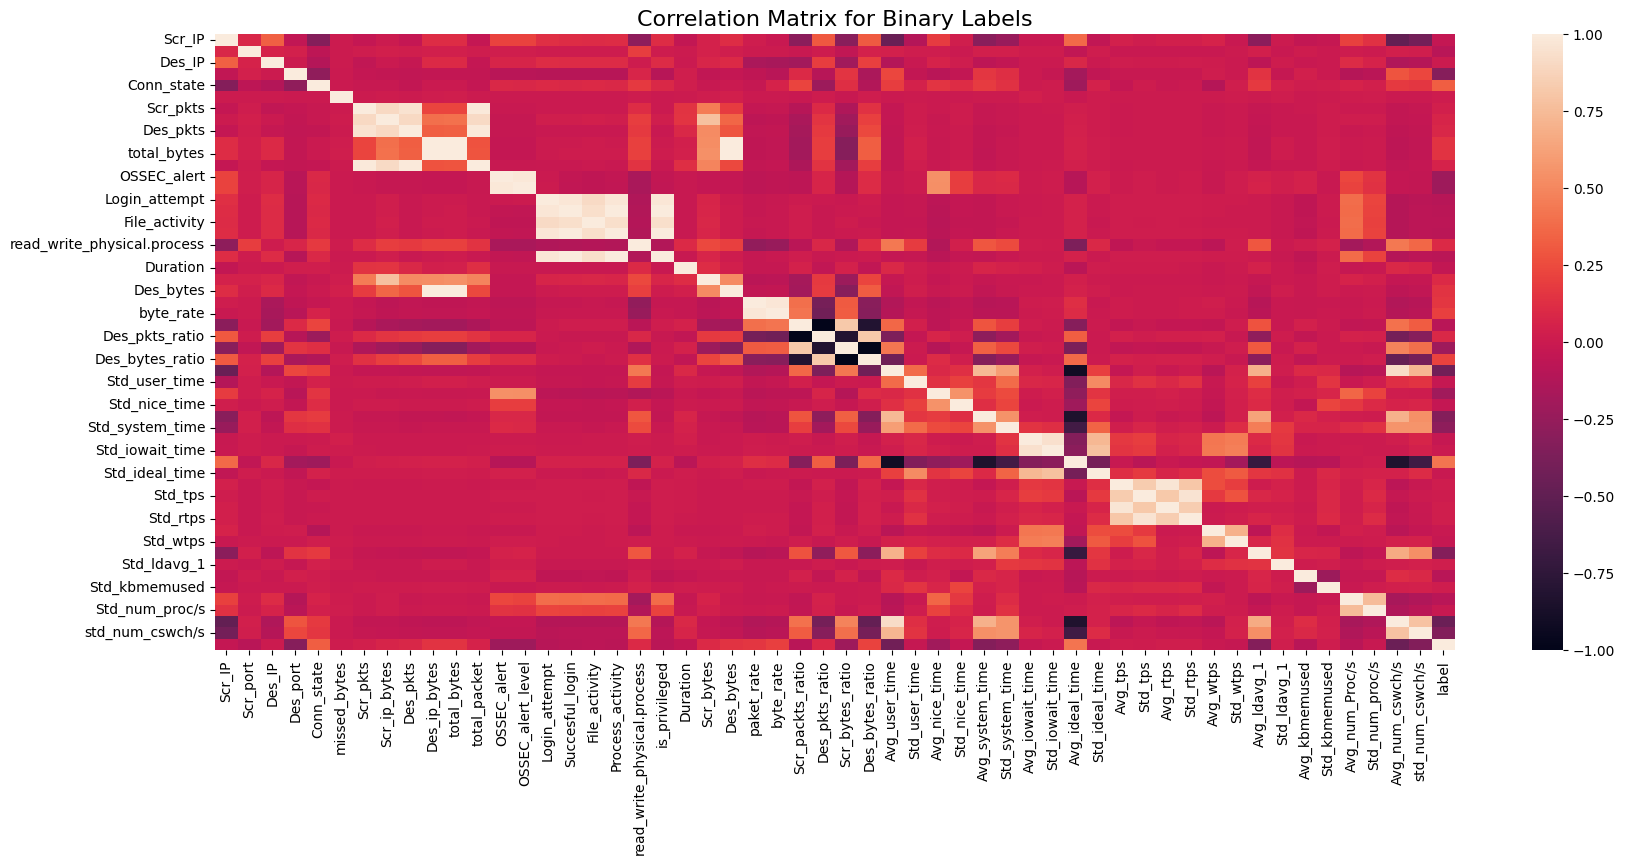

In [56]:
# Correlation Matrix for Binary Labels
plt.figure(figsize=(20,8))
corr_bin = bin_data[numeric_columns].corr()
sns.heatmap(corr_bin,vmax=1.0,annot=False)
plt.title('Correlation Matrix for Binary Labels',fontsize=16)
plt.savefig('correlation_matrix_bin.png')
plt.show()

Correlation Matrix for Multi-class Labels

In [57]:
numeric_columns = list(multi_data.select_dtypes(include='number').columns)

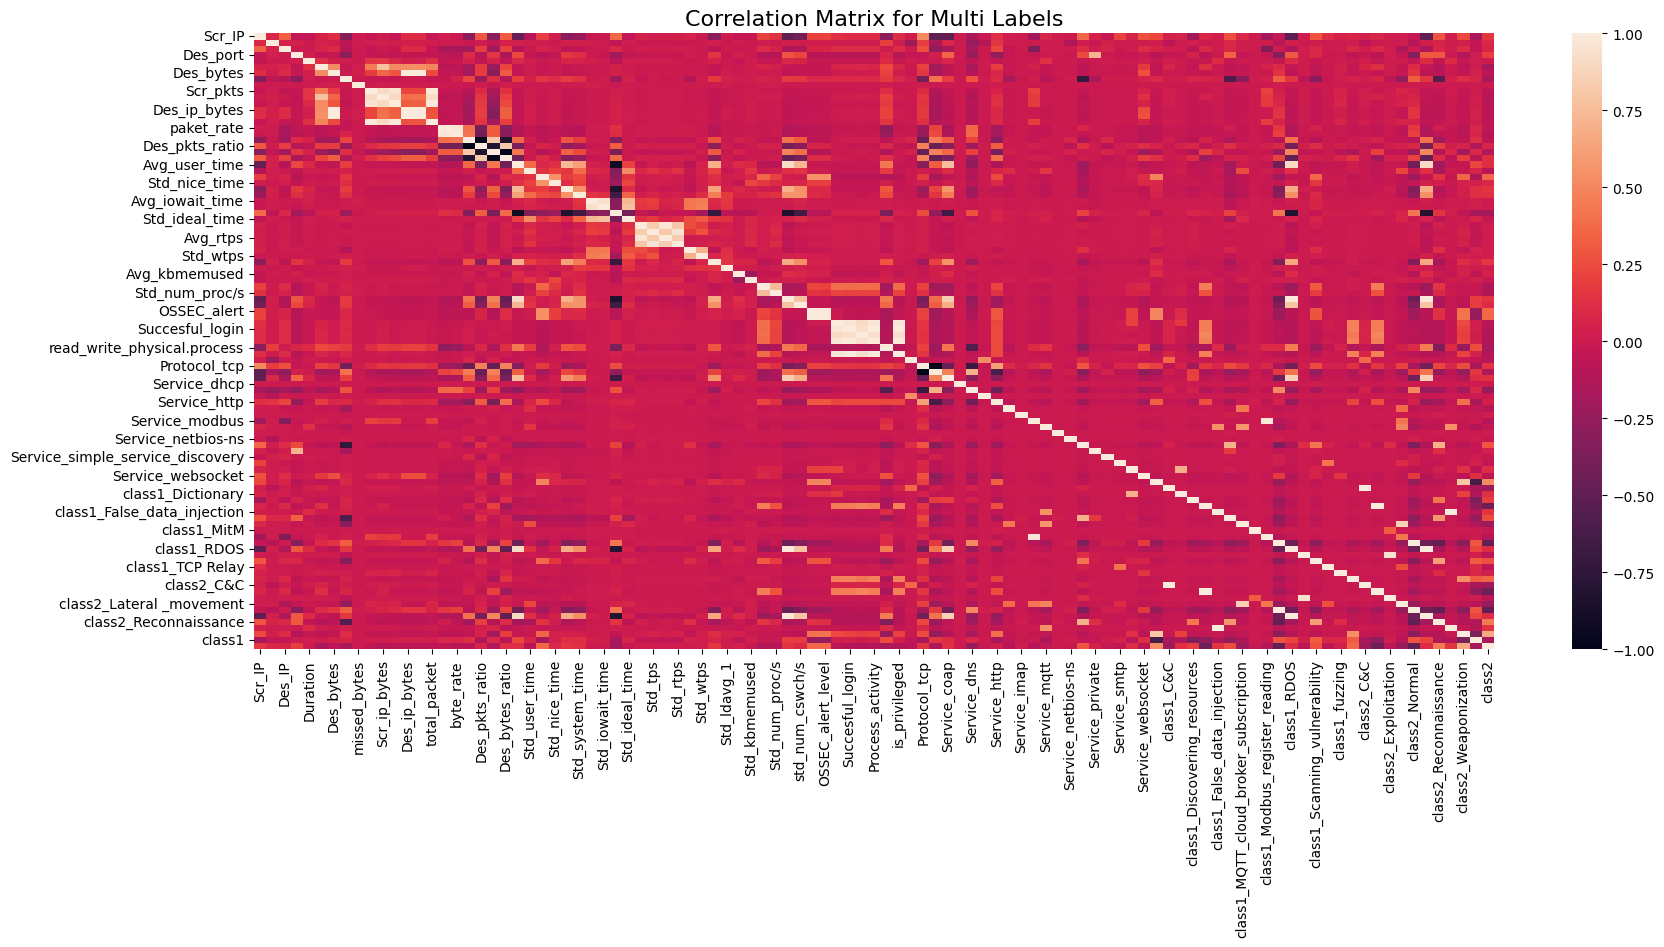

In [58]:
# Correlation Matrix for Multi-class Labels
plt.figure(figsize=(20,8))
corr_multi = multi_data[numeric_columns].corr()
sns.heatmap(corr_multi,vmax=1.0,annot=False)
plt.title('Correlation Matrix for Multi Labels',fontsize=16)
plt.savefig('correlation_matrix_multi.png')
plt.show()

**Feature Selection**

In [59]:
# finding the attributes which have more than 0.3 correlation with encoded attack label attribute
corr_ybin = abs(corr_bin['label'])
highest_corr_bin = corr_ybin[corr_ybin >0.3]
highest_corr_bin.sort_values(ascending=True)

Conn_state         0.323609
Des_port           0.326746
Avg_system_time    0.334165
Avg_ldavg_1        0.335724
std_num_cswch/s    0.343275
Avg_ideal_time     0.416336
Avg_user_time      0.417355
Avg_num_cswch/s    0.446482
label              1.000000
Name: label, dtype: float64

In [60]:
# selecting attributes found by using pearson correlation coefficient
bin_cols = highest_corr_bin.index
bin_cols

Index(['Des_port', 'Conn_state', 'Avg_user_time', 'Avg_system_time',
       'Avg_ideal_time', 'Avg_ldavg_1', 'Avg_num_cswch/s', 'std_num_cswch/s',
       'label'],
      dtype='object')

In [61]:
# Binary labelled Dataset
bin_data = bin_data[bin_cols].copy()
bin_data

,Des_port,Conn_state,Avg_user_time,Avg_system_time,Avg_ideal_time,Avg_ldavg_1,Avg_num_cswch/s,std_num_cswch/s,label
0,0.028797,0.0,0.199567,0.042697,0.863519,0.165617,0.049334,0.051567,0
1,0.028751,1.0,0.246068,0.030835,0.842278,0.148122,0.047906,0.038744,1
2,0.086911,1.0,0.269201,0.038107,0.826976,0.267320,0.052510,0.037334,1
3,0.086911,1.0,0.600230,0.156663,0.577195,0.508747,0.706312,0.336827,0
4,0.000811,1.0,0.110798,0.036895,0.904245,0.076977,0.056120,0.094827,1
...,...,...,...,...,...,...,...,...,...
92402,0.028797,1.0,0.112843,0.033582,0.904982,0.211103,0.051048,0.064692,0
92403,0.000811,1.0,0.072337,0.036798,0.894769,0.163984,0.056431,0.048519,1
92404,0.001223,1.0,0.231257,0.061815,0.769442,0.578493,0.106822,0.039404,0
92405,0.001223,1.0,0.220867,0.048579,0.812219,0.390250,0.055403,0.052801,1


In [62]:
bin_data.to_csv('.bin_data.csv')

**Multi-class Labels**

In [63]:
# finding the attributes which have more than 0.3 correlation with encoded attack label attribute
corr_ymulti = abs(corr_multi['class2'])
highest_corr_multi = corr_ymulti[corr_ymulti >0.3]
highest_corr_multi.sort_values(ascending=True)

Avg_nice_time              0.353276
class1_insider_malcious    0.356821
OSSEC_alert                0.362946
OSSEC_alert_level          0.364330
class1_Exfiltration        0.436692
class2_Exfiltration        0.436692
class2_Reconnaissance      0.443688
class1_Normal              0.488916
class2_Normal              0.488916
class1_BruteForce          0.528742
class2_Weaponization       0.662188
class2                     1.000000
Name: class2, dtype: float64

In [64]:
# selecting attributes found by using pearson correlation coefficient
multi_cols = highest_corr_multi.index
multi_cols

Index(['Avg_nice_time', 'OSSEC_alert', 'OSSEC_alert_level',
       'class1_BruteForce', 'class1_Exfiltration', 'class1_Normal',
       'class1_insider_malcious', 'class2_Exfiltration', 'class2_Normal',
       'class2_Reconnaissance', 'class2_Weaponization', 'class2'],
      dtype='object')

In [65]:
# Multi-class labelled Dataset
multi_data = multi_data[multi_cols].copy()

In [66]:
multi_data.to_csv('.multi_data.csv')

**BINARY CLASSIFICATION**

Data Splitting

In [67]:
X = bin_data.drop(columns=['label'],axis=1)
Y = bin_data['label']

In [68]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.20, random_state=50)

In [69]:
 rf_bin = RandomForestClassifier(random_state=123)
 rf_bin.fit(X_train,y_train)

RandomForestClassifier(random_state=123)

In [70]:
y_pred = rf_bin.predict(X_test)

In [71]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error -  0.056162752948815065
Mean Squared Error -  0.056162752948815065
Root Mean Squared Error -  0.23698682020064968
R2 Score -  77.20047728626704
Accuracy -  94.3837247051185


In [72]:
cls_report= classification_report(y_true=y_test, y_pred=y_pred,target_names=le1.classes_)
print(cls_report)

              precision    recall  f1-score   support

      Attack       0.95      0.92      0.93      8046
      Normal       0.94      0.96      0.95     10436

    accuracy                           0.94     18482
   macro avg       0.94      0.94      0.94     18482
weighted avg       0.94      0.94      0.94     18482



In [73]:
# Evaluate the Random Forest model
print("Random Forest Classifier:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Random Forest Classifier:
Confusion Matrix:
 [[ 7427   619]
 [  419 10017]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.92      0.93      8046
           1       0.94      0.96      0.95     10436

    accuracy                           0.94     18482
   macro avg       0.94      0.94      0.94     18482
weighted avg       0.94      0.94      0.94     18482

Accuracy: 0.943837247051185


In [74]:
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])

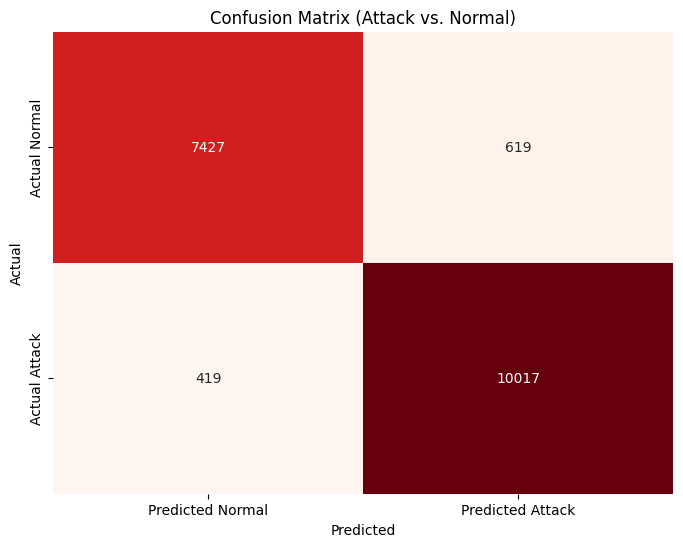

In [75]:
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", cbar=False,
            xticklabels=["Predicted Normal", "Predicted Attack"],
            yticklabels=["Actual Normal", "Actual Attack"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Attack vs. Normal)")
plt.show()

Real and Predicted Data

In [76]:
rf_bin_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
rf_bin_df.to_csv('.rf_real_pred_bin.csv')
rf_bin_df

,Actual,Predicted
65081,1,1
17587,0,0
86482,0,1
62449,1,1
18835,0,0
...,...,...
32020,1,1
3388,1,1
56872,1,1
86122,1,1


Plot between Real and Predicted Data

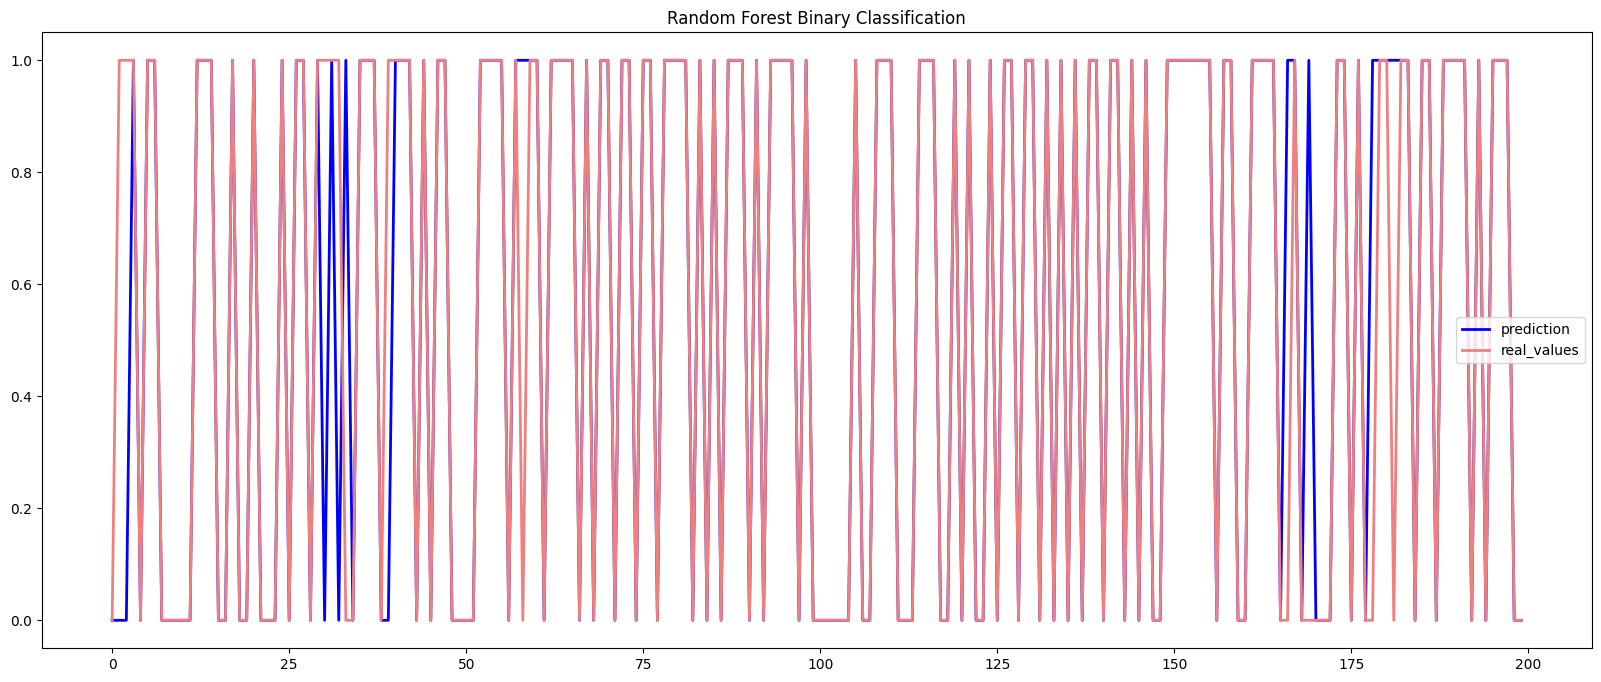

In [77]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[200:400], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[200:400].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.title("Random Forest Binary Classification")
plt.savefig('rf_real_pred_bin.png')
plt.show()

In [78]:
pkl_filename = "./random_forest_binary.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(rf_bin, file)
  print("Saved model to disk")
else:
  print("Model already saved")

Model already saved


**Decision Tree Classifier**

In [79]:
dt_bin = DecisionTreeClassifier(random_state=123)
dt_bin.fit(X_train,y_train)

DecisionTreeClassifier(random_state=123)

In [80]:
y_pred = dt_bin.predict(X_test)

In [81]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error -  0.0726652959636403
Mean Squared Error -  0.0726652959636403
Root Mean Squared Error -  0.26956501249910064
R2 Score -  70.55773090661998
Accuracy -  92.73347040363596


In [82]:
# Evaluate the Random Forest model
print("Decision Tree Classifier:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Decision Tree Classifier:
Confusion Matrix:
 [[7532  514]
 [ 829 9607]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.94      0.92      8046
           1       0.95      0.92      0.93     10436

    accuracy                           0.93     18482
   macro avg       0.93      0.93      0.93     18482
weighted avg       0.93      0.93      0.93     18482

Accuracy: 0.9273347040363596


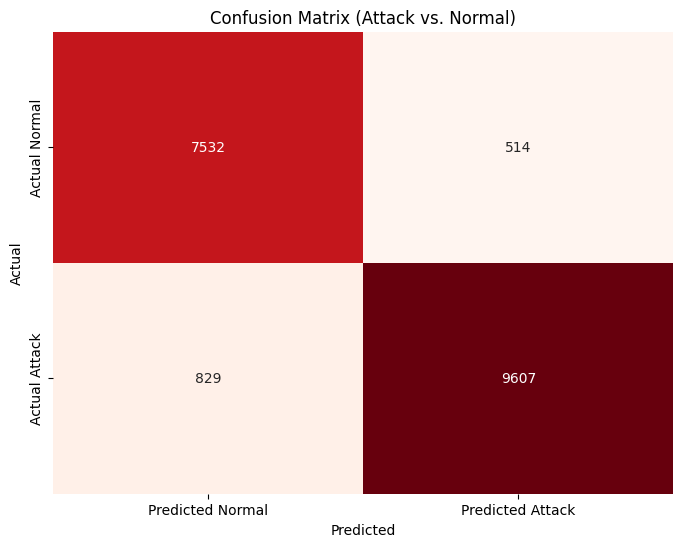

In [83]:
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", cbar=False,
            xticklabels=["Predicted Normal", "Predicted Attack"],
            yticklabels=["Actual Normal", "Actual Attack"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Attack vs. Normal)")
plt.show()

Real and Predicted Data

In [84]:
dt_bin_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
dt_bin_df.to_csv('./dt_real_pred_bin.csv')
dt_bin_df

,Actual,Predicted
65081,1,1
17587,0,0
86482,0,1
62449,1,1
18835,0,0
...,...,...
32020,1,1
3388,1,1
56872,1,1
86122,1,1


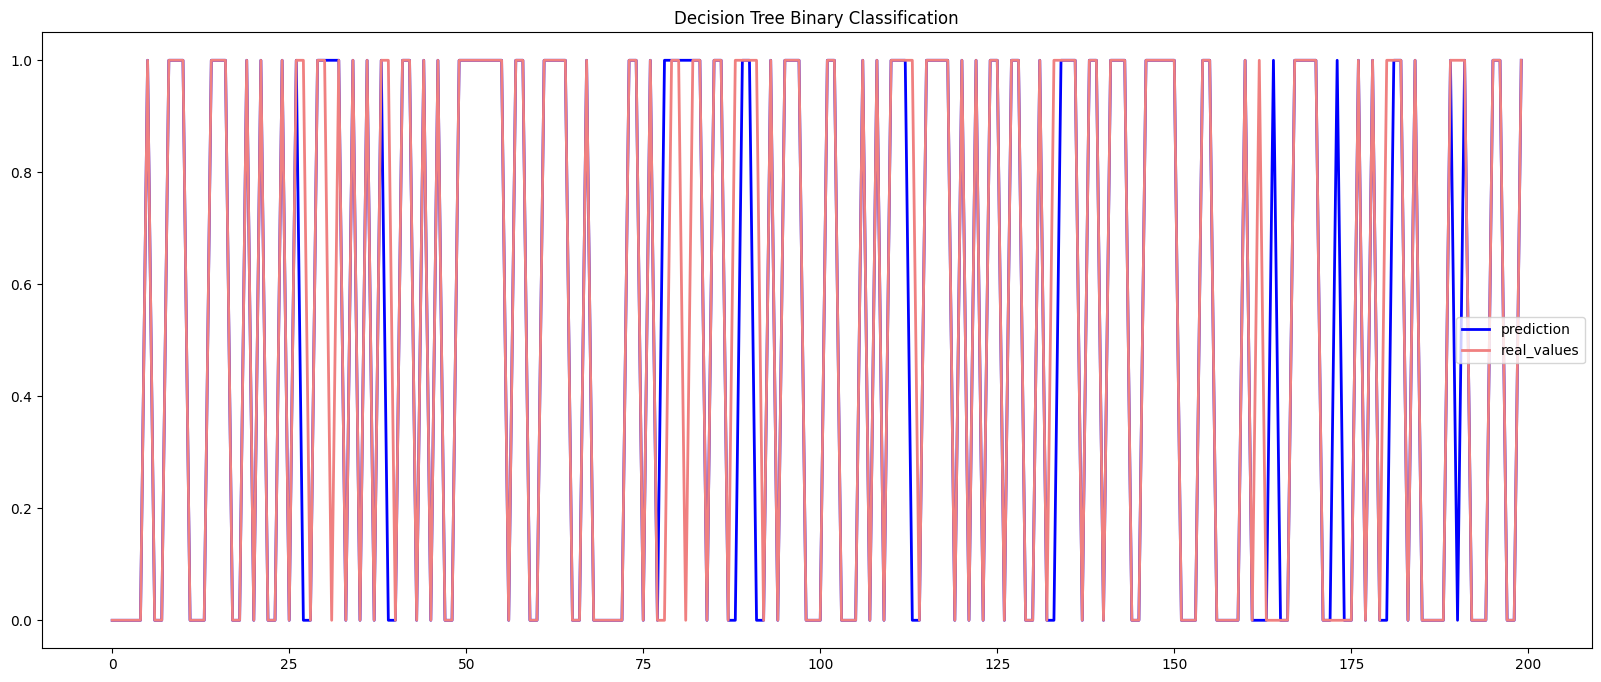

In [85]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[300:500], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[300:500].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.title("Decision Tree Binary Classification")
plt.savefig('dt_real_pred_bin.png')
plt.show()

In [86]:
pkl_filename = "./decision_tree_binary.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(dt_bin, file)
  print("Saved model to disk")
else:
  print("Model already saved")

Model already saved


**MULTI-CLASS CLASSIFICATION**

Data Splitting

In [87]:
multi_data

,Avg_nice_time,OSSEC_alert,OSSEC_alert_level,class1_BruteForce,class1_Exfiltration,class1_Normal,class1_insider_malcious,class2_Exfiltration,class2_Normal,class2_Reconnaissance,class2_Weaponization,class2
0,0.093479,0.0,0.0,0,0,0,0,0,0,0,0,3
1,0.112325,0.0,0.0,0,0,1,0,0,1,0,0,4
2,0.094331,0.0,0.0,0,0,1,0,0,1,0,0,4
3,0.071575,0.0,0.0,0,0,0,0,0,0,0,0,5
4,0.123202,0.0,0.0,0,0,1,0,0,1,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
92402,0.127111,0.0,0.0,0,0,0,0,0,0,0,0,7
92403,0.078793,0.0,0.0,0,0,1,0,0,1,0,0,4
92404,0.380031,0.0,0.0,1,0,0,0,0,0,0,1,8
92405,0.157185,0.0,0.0,0,0,1,0,0,1,0,0,4


In [88]:
X = multi_data.drop(columns=['class2'],axis=1)
Y = multi_data['class2']


In [89]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.30, random_state=100)

Random Forest Classifier

In [90]:
rf_multi = RandomForestClassifier(random_state=50)
rf_multi.fit(X_train,y_train)

RandomForestClassifier(random_state=50)

In [91]:
y_pred = rf_multi.predict(X_test)

In [ ]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error -  0.05973379504382643
Mean Squared Error -  0.23056667748800636
Root Mean Squared Error -  0.4801735909939304
R2 Score -  87.75622285467536
Accuracy -  98.22530029217617


In [94]:
print(classification_report(y_test, y_pred,target_names=le2.classes_))

                   precision    recall  f1-score   support

              C&C       0.13      0.10      0.11        89
     Exfiltration       1.00      1.00      1.00       783
     Exploitation       0.11      0.05      0.06        43
Lateral _movement       0.79      0.84      0.82      1183
           Normal       1.00      1.00      1.00     15637
             RDOS       0.98      1.00      0.99      3557
   Reconnaissance       1.00      1.00      1.00      4431
        Tampering       0.16      0.09      0.12       198
    Weaponization       1.00      1.00      1.00      1802

         accuracy                           0.98     27723
        macro avg       0.69      0.68      0.68     27723
     weighted avg       0.98      0.98      0.98     27723



In [96]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Calculate accuracy, precision, recall, and F1-score for each attack category
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)

# Create a DataFrame
data = {
    'Attack': le2.classes_,
    'Accuracy (%)': [accuracy * 100] * len(le2.classes_),
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
}

df = pd.DataFrame(data)

# Print the DataFrame
print(df)

              Attack  Accuracy (%)  Precision    Recall  F1 Score
0                C&C       98.2253   0.126761  0.101124  0.112500
1       Exfiltration       98.2253   1.000000  1.000000  1.000000
2       Exploitation       98.2253   0.105263  0.046512  0.064516
3  Lateral _movement       98.2253   0.794094  0.841082  0.816913
4             Normal       98.2253   1.000000  1.000000  1.000000
5               RDOS       98.2253   0.983126  0.999157  0.991076
6     Reconnaissance       98.2253   1.000000  1.000000  1.000000
7          Tampering       98.2253   0.160714  0.090909  0.116129
8      Weaponization       98.2253   1.000000  1.000000  1.000000


Real and Predicted Data

In [97]:
rf_multi_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
rf_multi_df.to_csv('./rf_real_pred_multi.csv')
rf_multi_df

,Actual,Predicted
56175,8,8
18341,4,4
54989,4,4
54623,4,4
84840,6,6
...,...,...
51212,4,4
18772,5,5
38308,4,4
89364,7,7


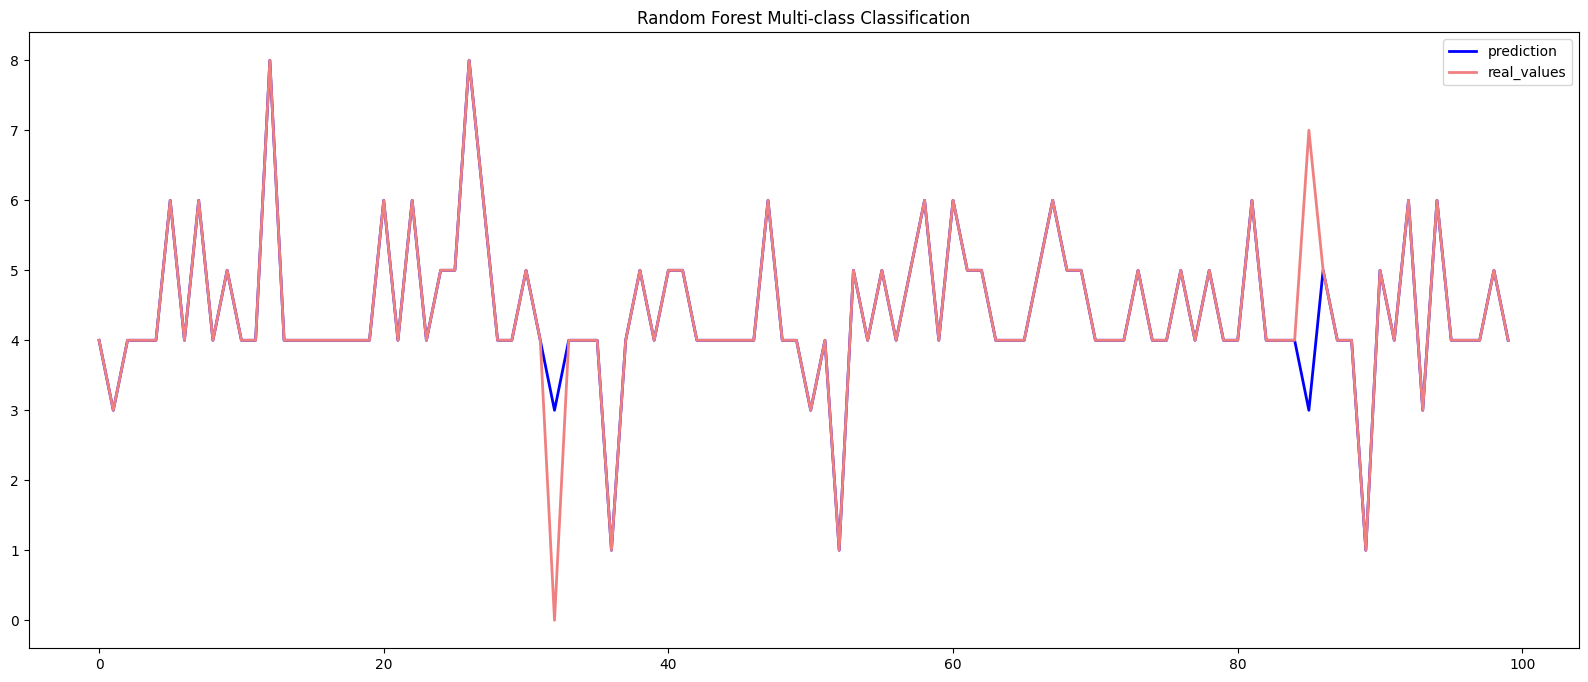

In [98]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[500:600], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[500:600].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.title("Random Forest Multi-class Classification")
plt.savefig('rf_real_pred_multi.png')
plt.show()

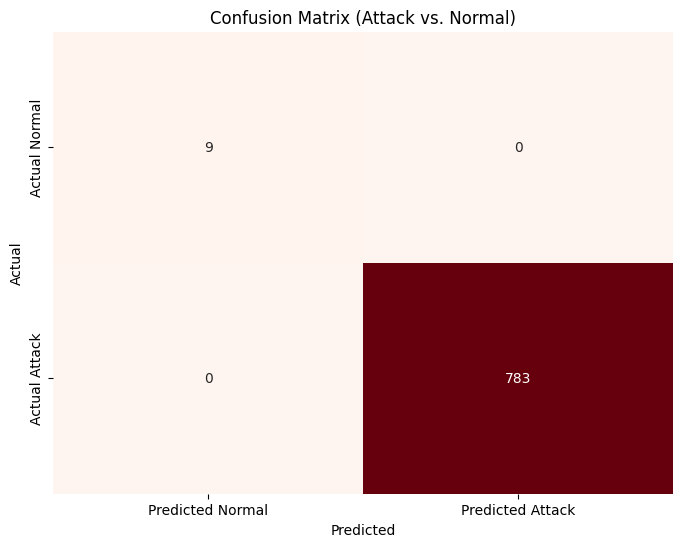

In [99]:
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", cbar=False,
            xticklabels=["Predicted Normal", "Predicted Attack"],
            yticklabels=["Actual Normal", "Actual Attack"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Attack vs. Normal)")
plt.show()

In [100]:
pkl_filename = "./random_forest_multi.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(rf_multi, file)
  print("Saved model to disk")
else:
  print("Model already saved")

Model already saved


Decision Tree Classifier

In [101]:
dt_multi = DecisionTreeClassifier(random_state=123)
dt_multi.fit(X_train,y_train)

DecisionTreeClassifier(random_state=123)

In [102]:
y_pred = dt_multi.predict(X_test)

In [103]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error -  0.06330483713883779
Mean Squared Error -  0.24503120152941602
Root Mean Squared Error -  0.49500626413149157
R2 Score -  86.99757295678815
Accuracy -  98.10265844244852


In [104]:
print(classification_report(y_test, y_pred,target_names=le2.classes_))

                   precision    recall  f1-score   support

              C&C       0.09      0.12      0.11        89
     Exfiltration       1.00      1.00      1.00       783
     Exploitation       0.10      0.07      0.08        43
Lateral _movement       0.79      0.81      0.80      1183
           Normal       1.00      1.00      1.00     15637
             RDOS       0.98      1.00      0.99      3557
   Reconnaissance       1.00      1.00      1.00      4431
        Tampering       0.13      0.06      0.08       198
    Weaponization       1.00      1.00      1.00      1802

         accuracy                           0.98     27723
        macro avg       0.68      0.67      0.67     27723
     weighted avg       0.98      0.98      0.98     27723



In [105]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Calculate accuracy, precision, recall, and F1-score for each attack category
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)

# Create a DataFrame
data = {
    'Attack': le2.classes_,
    'Accuracy (%)': [accuracy * 100] * len(le2.classes_),
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
}

df = pd.DataFrame(data)

# Print the DataFrame
print(df)

              Attack  Accuracy (%)  Precision    Recall  F1 Score
0                C&C     98.102658   0.091667  0.123596  0.105263
1       Exfiltration     98.102658   1.000000  1.000000  1.000000
2       Exploitation     98.102658   0.096774  0.069767  0.081081
3  Lateral _movement     98.102658   0.793416  0.814877  0.804003
4             Normal     98.102658   1.000000  1.000000  1.000000
5               RDOS     98.102658   0.983126  0.999157  0.991076
6     Reconnaissance     98.102658   1.000000  1.000000  1.000000
7          Tampering     98.102658   0.134831  0.060606  0.083624
8      Weaponization     98.102658   1.000000  1.000000  1.000000


Real and Predicted Data

In [106]:
dt_multi_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
dt_multi_df.to_csv('./dt_real_pred_multi.csv')
dt_multi_df

,Actual,Predicted
56175,8,8
18341,4,4
54989,4,4
54623,4,4
84840,6,6
...,...,...
51212,4,4
18772,5,5
38308,4,4
89364,7,7


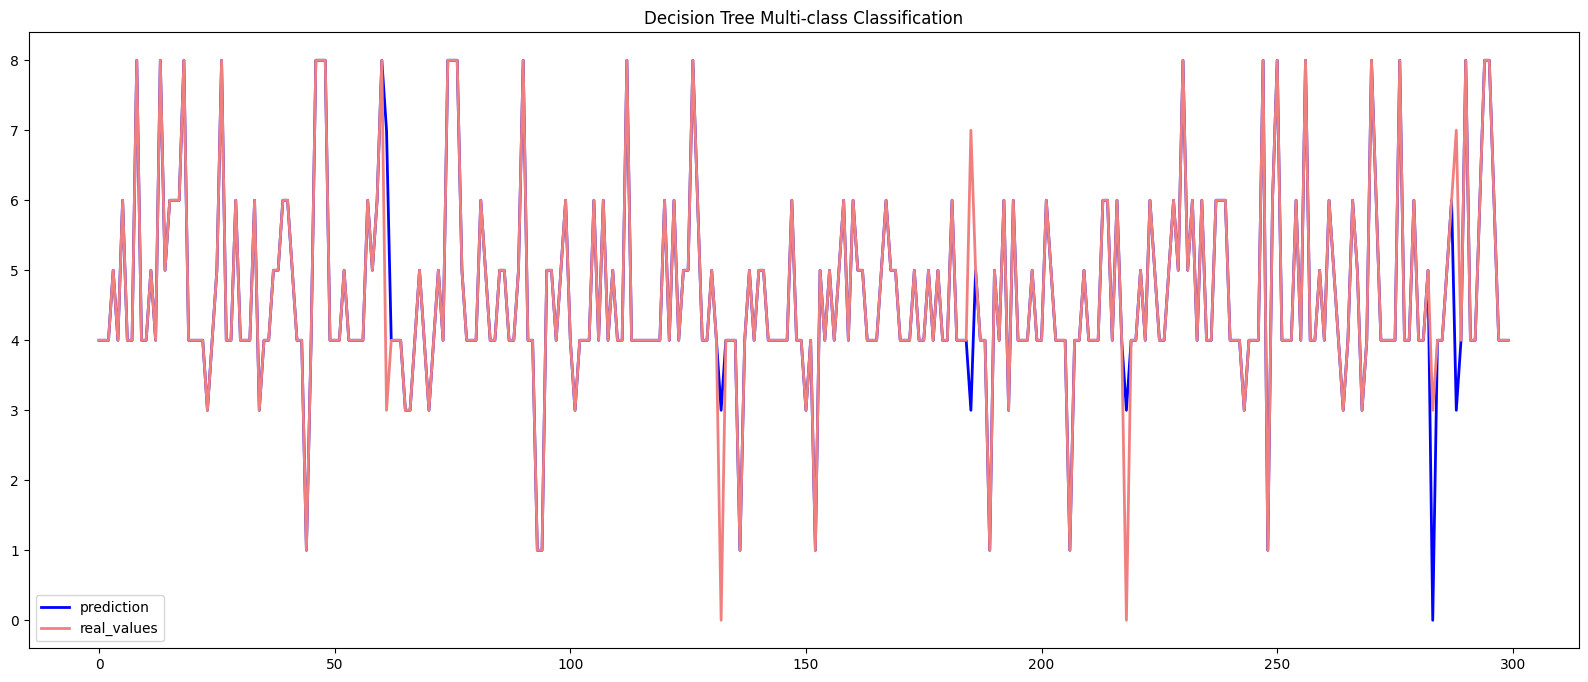

In [107]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[400:700], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[400:700].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.title("Decision Tree Multi-class Classification")
plt.savefig('dt_real_pred_multi.png')
plt.show()

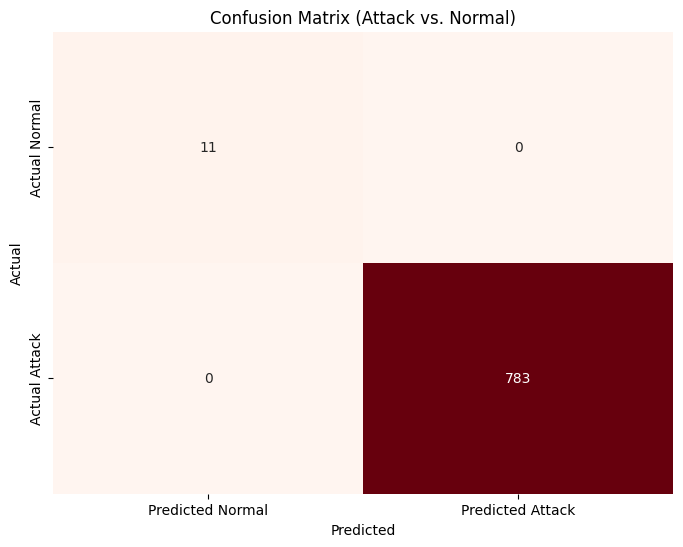

In [108]:
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", cbar=False,
            xticklabels=["Predicted Normal", "Predicted Attack"],
            yticklabels=["Actual Normal", "Actual Attack"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Attack vs. Normal)")
plt.show()

In [109]:
pkl_filename = "./decision_tree_multi.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(dt_multi, file)
  print("Saved model to disk")
else:
  print("Model already saved")

Model already saved


**Full Connected Convolutional neural network (CNN)**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras


Binary Classification

In [ ]:
X = bin_data.drop(columns=['label'], axis=1)
Y = bin_data['label']

In [ ]:
# Split the data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [ ]:
# Build the binary classification model
binary_model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')  # Binary classification
])

binary_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
binary_model.summary()

history_binary = binary_model.fit(X_train_scaled, y_train, epochs=20, batch_size=64, validation_data=(X_val_scaled, y_val))


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               1152      
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 9,473
Trainable params: 9,473
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
1156/1156 [==============================

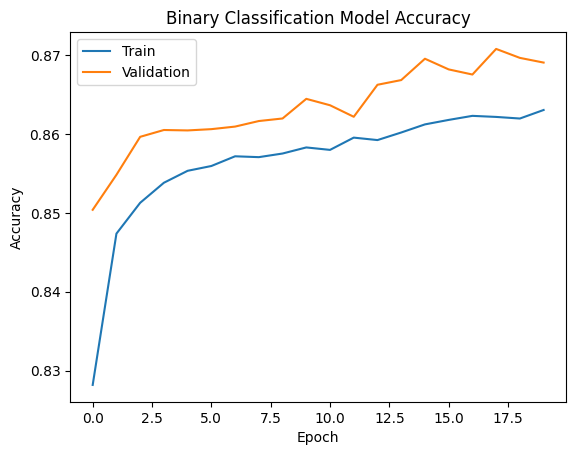

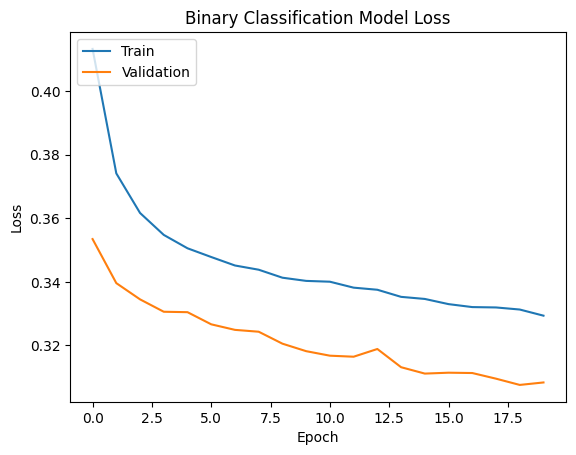

In [ ]:

# Plot training & validation accuracy values
plt.plot(history_binary.history['accuracy'])
plt.plot(history_binary.history['val_accuracy'])
plt.title('Binary Classification Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history_binary.history['loss'])
plt.plot(history_binary.history['val_loss'])
plt.title('Binary Classification Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


578/578 [==============================] - 1s 2ms/step


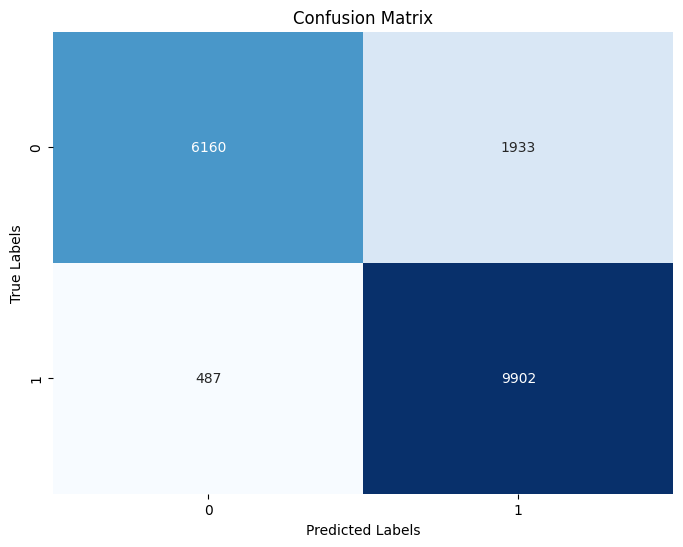

              precision    recall  f1-score   support

           0       0.93      0.76      0.84      8093
           1       0.84      0.95      0.89     10389

    accuracy                           0.87     18482
   macro avg       0.88      0.86      0.86     18482
weighted avg       0.88      0.87      0.87     18482



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Predict binary labels on the validation set
y_val_pred = binary_model.predict(X_val_scaled)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)

# Create a confusion matrix
cm = confusion_matrix(y_val, y_val_pred_binary)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Print classification report
print(classification_report(y_val, y_val_pred_binary))


In [ ]:
import joblib
# Save binary classification CNN model
binary_model_filename = "binary_cnn_model.pkl"
if not path.isfile(binary_model_filename):
    joblib.dump(binary_model, binary_model_filename)
    print("Saved binary classification CNN model to disk")
else:
    print("Binary classification CNN model already saved")

Saved binary classification CNN model to disk


**Multi-Class Classification**

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# Load and preprocess your data
X = multi_data.drop(columns=['class2'], axis=1)
Y = multi_data['class2']

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [ ]:
# Build the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(len(np.unique(Y)), activation='softmax')  # Using softmax for multi-class
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_multi = model.fit(X_train_scaled, Y_train, validation_data=(X_val_scaled, Y_val), epochs=10, batch_size=32)


Epoch 1/10
2311/2311 [==============================] - 15s 5ms/step - loss: 0.1959 - accuracy: 0.9398 - val_loss: 0.1412 - val_accuracy: 0.9521
Epoch 2/10
2311/2311 [==============================] - 11s 5ms/step - loss: 0.1445 - accuracy: 0.9500 - val_loss: 0.1401 - val_accuracy: 0.9507
Epoch 3/10
2311/2311 [==============================] - 9s 4ms/step - loss: 0.1436 - accuracy: 0.9496 - val_loss: 0.1404 - val_accuracy: 0.9494
Epoch 4/10
2311/2311 [==============================] - 5s 2ms/step - loss: 0.1431 - accuracy: 0.9501 - val_loss: 0.1398 - val_accuracy: 0.9510
Epoch 5/10
2311/2311 [==============================] - 10s 4ms/step - loss: 0.1431 - accuracy: 0.9502 - val_loss: 0.1398 - val_accuracy: 0.9515
Epoch 6/10
2311/2311 [==============================] - 5s 2ms/step - loss: 0.1428 - accuracy: 0.9503 - val_loss: 0.1388 - val_accuracy: 0.9512
Epoch 7/10
2311/2311 [==============================] - 6s 3ms/step - loss: 0.1426 - accuracy: 0.9505 - val_loss: 0.1400 - val_accura

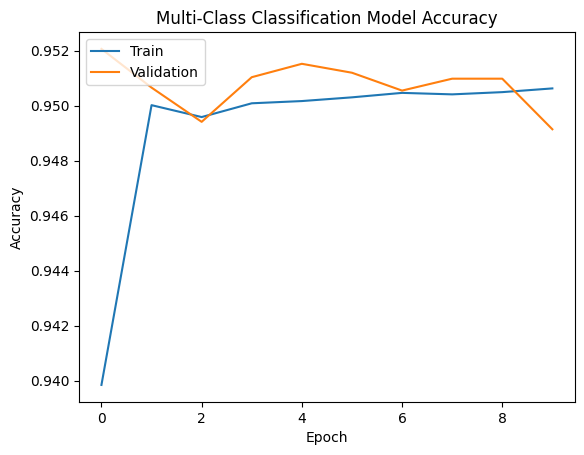

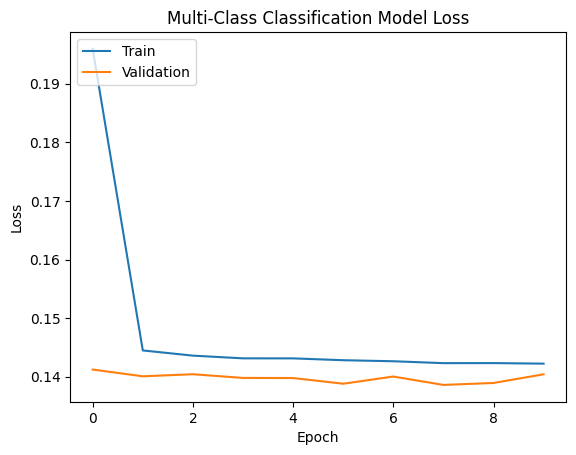

In [ ]:
# Plot training & validation accuracy values
plt.plot(history_multi.history['accuracy'])
plt.plot(history_multi.history['val_accuracy'])
plt.title('Multi-Class Classification Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history_multi.history['loss'])
plt.plot(history_multi.history['val_loss'])
plt.title('Multi-Class Classification Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

578/578 [==============================] - 1s 1ms/step


<function matplotlib.pyplot.xlabel(xlabel, fontdict=None, labelpad=None, *, loc=None, **kwargs)>

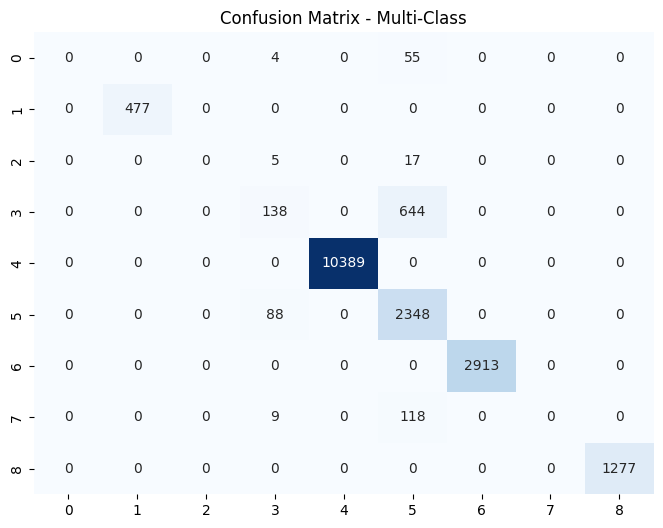

In [ ]:
# Predict multi-class labels on the validation set
y_val_pred = model.predict(X_val_scaled)
y_val_pred_classes = np.argmax(y_val_pred, axis=1)

# Create a confusion matrix
cm = confusion_matrix(Y_val, y_val_pred_classes)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Multi-Class")
plt.xlabel


In [ ]:
# Save multi-class classification CNN model
multi_model_filename = "multi_cnn_model.pkl"
if not path.isfile(multi_model_filename):
    joblib.dump(model, multi_model_filename)
    print("Saved multi-class CNN model to disk")
else:
    print("Multi-class CNN model already saved")

Saved multi-class CNN model to disk
